In [3]:
import os, types
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [4]:
data = pd.read_csv("Play Store Data.csv")

In [6]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [13]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

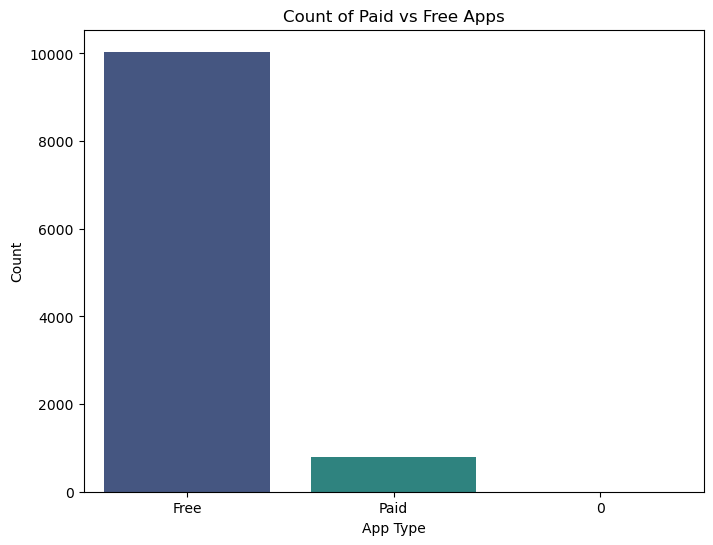

In [7]:
# Count of paid vs free apps

app_type_count = data['Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=app_type_count.index, y=app_type_count.values, palette='viridis')
plt.title('Count of Paid vs Free Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()

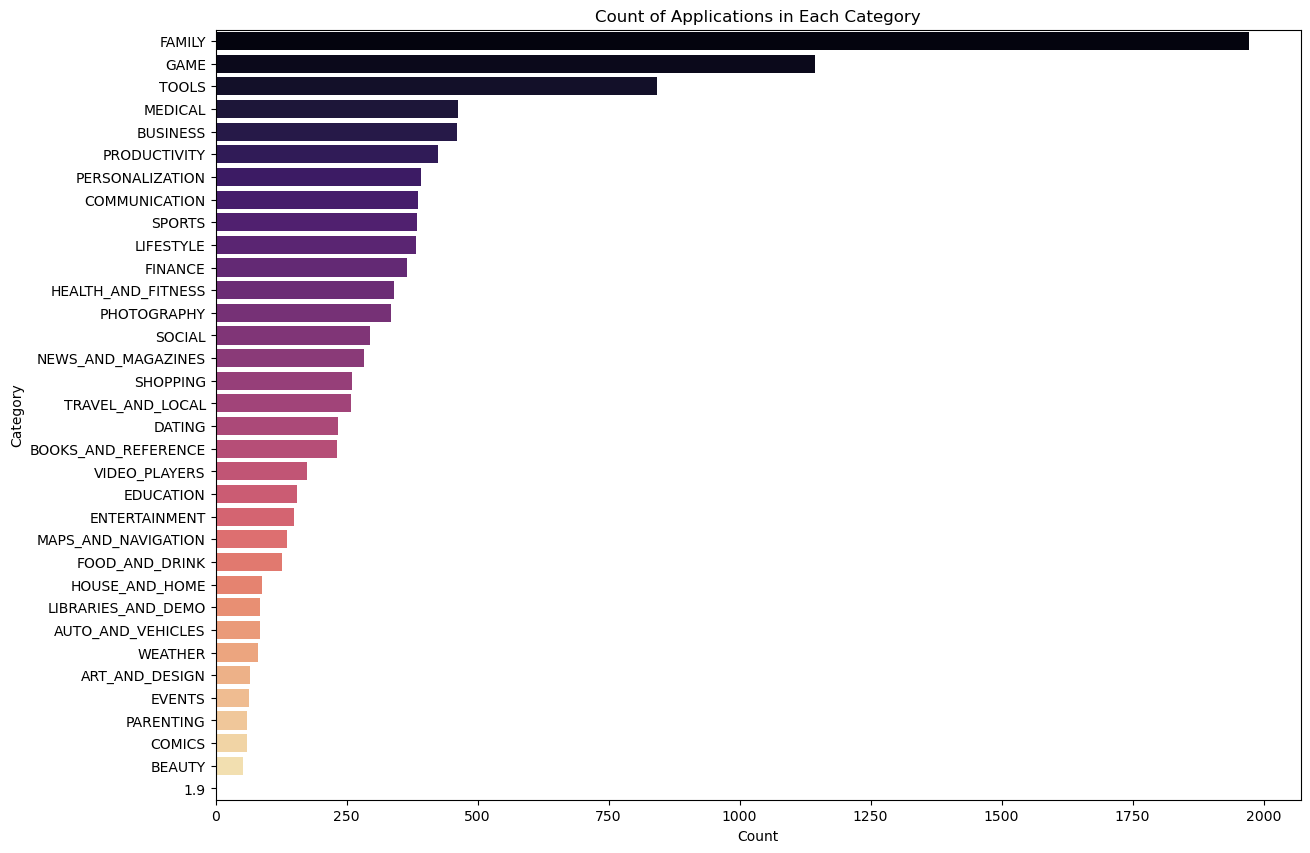

In [8]:
# Count of applications in each category
category_count = data['Category'].value_counts()
plt.figure(figsize=(14, 10))
sns.barplot(y=category_count.index, x=category_count.values, palette='magma')
plt.title('Count of Applications in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


In [9]:
# Top 10 free apps by rating
top_free_apps = data[data['Type'] == 'Free'].nlargest(10, 'Rating')[['App', 'Rating']]

# Display the list of top 10 free apps
print("Top 10 Free Apps by Rating:")
for index, row in top_free_apps.iterrows():
    print(f"{index + 1}. {row['App']} - Rating: {row['Rating']}")

Top 10 Free Apps by Rating:
330. Hojiboy Tojiboyev Life Hacks - Rating: 5.0
613. American Girls Mobile Numbers - Rating: 5.0
616. Awake Dating - Rating: 5.0
634. Spine- The dating app - Rating: 5.0
637. Girls Live Talk - Free Text and Video Chat - Rating: 5.0
641. Online Girls Chat Group - Rating: 5.0
655. Speeding Joyride & Car Meet App - Rating: 5.0
1029. SUMMER SONIC app - Rating: 5.0
1031. Prosperity - Rating: 5.0
1039. Mindvalley U Tallinn 2018 - Rating: 5.0


In [10]:
# Top 10 paid apps by rating
top_paid_apps = data[data['Type'] == 'Paid'].nlargest(10, 'Rating')[['App', 'Rating']]

# Display the list of top 10 free apps
print("Top 10 Paid Apps by Rating:")
for index, row in top_paid_apps.iterrows():
    print(f"{index + 1}. {row['App']} - Rating: {row['Rating']}")


Top 10 Paid Apps by Rating:
2263. Super Hearing Secret Voices Recorder PRO - Rating: 5.0
2272. FHR 5-Tier 2.0 - Rating: 5.0
3958. ADS-B Driver - Rating: 5.0
4453. P-Home for KLWP - Rating: 5.0
4478. Android P Style Icon Pack - Rating: 5.0
4989. Easy Hotspot Ad Free - Rating: 5.0
5238. Hey AJ! It's Saturday! - Rating: 5.0
5247. Hey AJ! It's Bedtime! - Rating: 5.0
5261. AJ Gray Dark Icon Pack - Rating: 5.0
5264. AJ Blue Icon Pack - Rating: 5.0


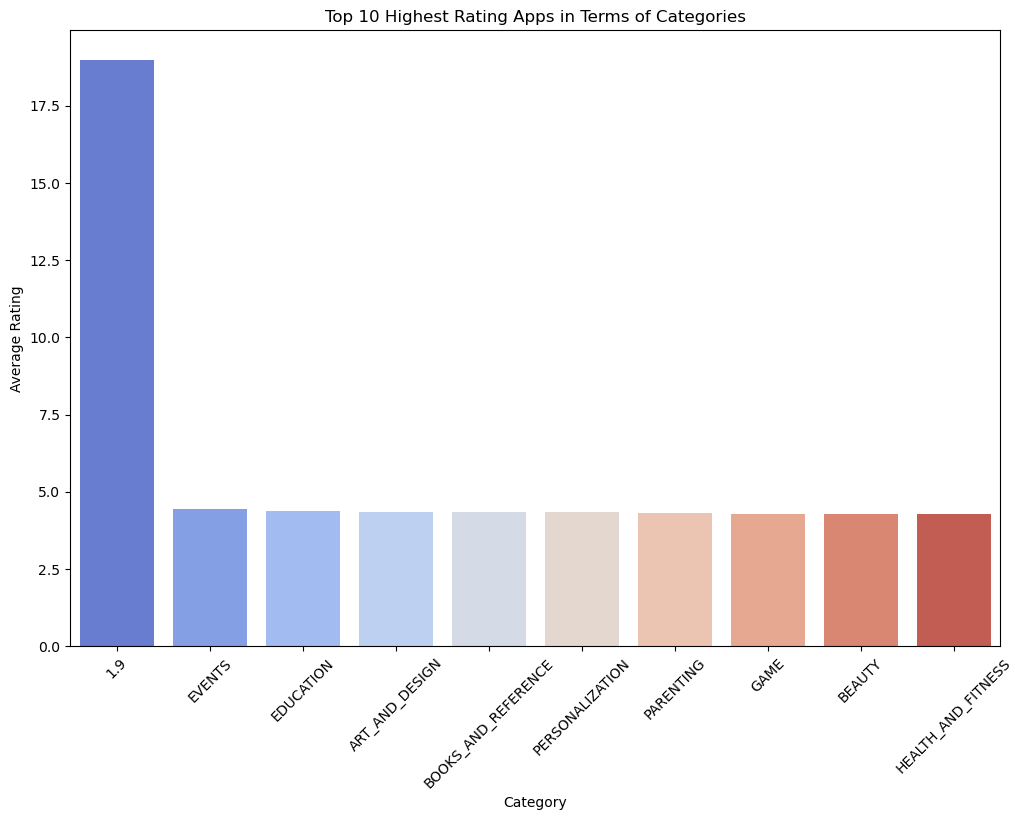

In [11]:
# Top 10 highest rating apps in terms of categories
top_rated_apps = data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_rated_apps.index, y=top_rated_apps.values, palette='coolwarm')
plt.title('Top 10 Highest Rating Apps in Terms of Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Average rating by category
avg_rating_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
avg_rating_category

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

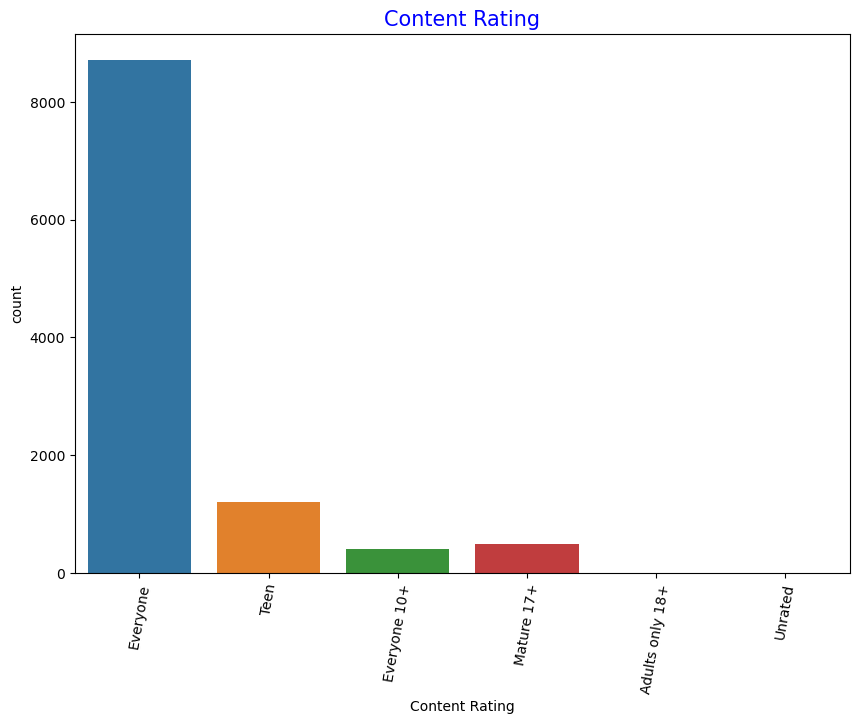

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()